<a href="https://colab.research.google.com/github/BoosterGold98/Data-Visualization-of-COVID19-/blob/master/BarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Bar Chart Race is very useful in viewing the gradual trends of a dataset over the course of time. It is a very powerful visualization technique and can be used to visualize the increment or decrement of data ovr time. Usually, interpolation is used in Bar Chart Races if the data is not sufficient as the animation may get over quickly. 

The spread of COVID19 across the globe is depicted here by the Bar Chart Race. An example of Bar Chart Race is as follows: 
![BarChart race](https://greatified.files.wordpress.com/2019/03/gif-1.gif)

In [0]:
#importing the necessary libraries
import pandas as pd           
import random
import numpy as np
import matplotlib.ticker as ticker #matplotlib is used here to create the bar chart race
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('/content/sample_data/covid_19_data.csv')
data.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)
data = data[["Date", "State", "Country", "Confirmed", "Deaths", "Recovered"]]
data_group = data.groupby(['Country','Date'])
data_group.head(10)

Date              State  ... Deaths  Recovered
0      01/22/2020              Anhui  ...    0.0        0.0
1      01/22/2020            Beijing  ...    0.0        0.0
2      01/22/2020          Chongqing  ...    0.0        0.0
3      01/22/2020             Fujian  ...    0.0        0.0
4      01/22/2020              Gansu  ...    0.0        0.0
...           ...                ...  ...    ...        ...
24797  05/14/2020       Sint Maarten  ...   15.0       46.0
24798  05/14/2020    South Australia  ...    4.0      434.0
24802  05/14/2020           Tasmania  ...   13.0      188.0
24816  05/14/2020           Victoria  ...   18.0     1407.0
24821  05/14/2020  Western Australia  ...    9.0      538.0

[18434 rows x 6 columns]

The dataset required for this code is available [here.](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data?select=covid_19_data.csv). The dataset here is updated daily. The first step is to rename the columns for convenience. The first 10 rows is then displayed.

In [0]:
covid = data_group.sum().reset_index().sort_values(['Date'],ascending=False) 
covid = covid[covid.Confirmed>0]
covid = covid[::-1]
covid.head(10)
cov = (covid[covid['Date'].eq("05/14/2020")].sort_values(by="Confirmed",ascending=False).head(10)) #getting the top 10 ranked confirmed cases over time

In [6]:
cov.head(10)

Country        Date  Confirmed   Deaths  Recovered
12967       US  05/14/2020  1417774.0  85898.0   246414.0
10308   Russia  05/14/2020   252245.0   2305.0    53530.0
12853       UK  05/14/2020   234440.0  33693.0     1043.0
11637    Spain  05/14/2020   229540.0  27321.0   143374.0
6135     Italy  05/14/2020   223096.0  31368.0   115288.0
1732    Brazil  05/14/2020   203165.0  13999.0    79479.0
4280    France  05/14/2020   178994.0  27428.0    59719.0
4601   Germany  05/14/2020   174478.0   7884.0   150300.0
12748   Turkey  05/14/2020   144749.0   4007.0   104030.0
5788      Iran  05/14/2020   114533.0   6854.0    90539.0

Text(0, 0.5, 'Country')

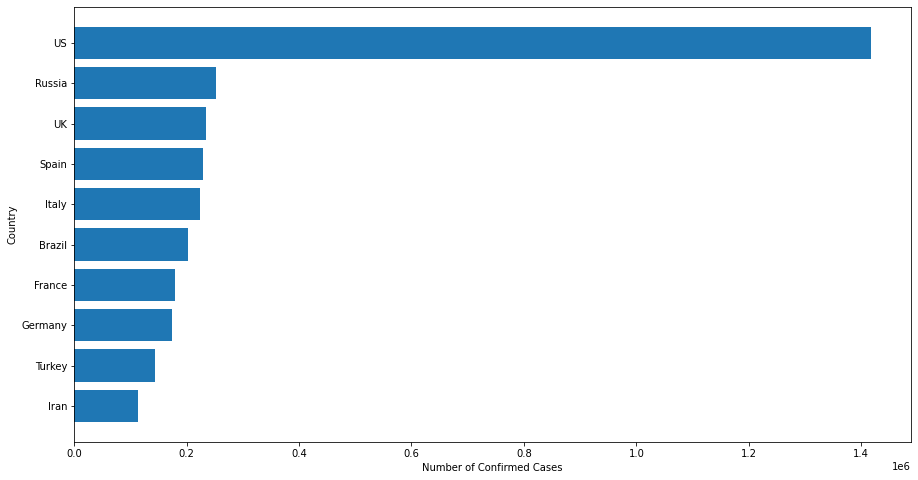

In [7]:
cov=cov[::-1]                                    #arranging the bar chart from highest to lowest
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(cov['Country'], cov['Confirmed'])
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')

The color representing for each country can be customized. The color codes can be found using this [site.](https://htmlcolorcodes.com/color-chart/) The other customizations include axes, labels, etc.

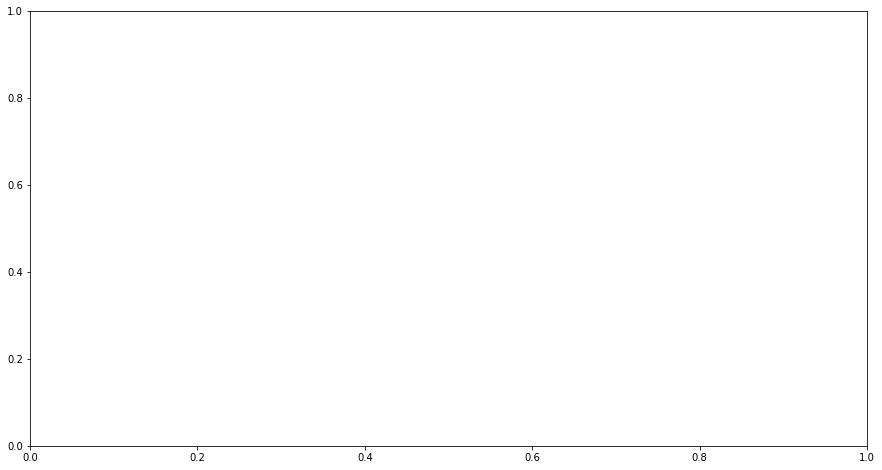

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date,case="Deaths"):
    dff= (covid[covid['Date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    ax.barh(dff['Country'], dff[case], color=["#A61D15","#C70039","#FF5733","#D84E4E","#FFC300","#F7EC10","#D0F710","#9CF710","#B4D67F","#969C8E"][::-1])
    dx = dff[case].max() / 200
    for i, (value, name) in enumerate(zip(dff[case], dff['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
        ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
        ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777')
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#777777', labelsize=12)
        ax.set_yticks([])
        ax.margins(0, 0.01)
        ax.grid(which='major', axis='x', linestyle='-')
        ax.set_axisbelow(True)
        ax.text(0, 1.12, 'The number of '+str(case)+' Cases upto 12 May 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

The final part is building the animation by setting intervals and producing bar charts for each day as frames. The bar chart can be played using the HTML method. If one wishes to save the animation, simply uncomment the animator save method.

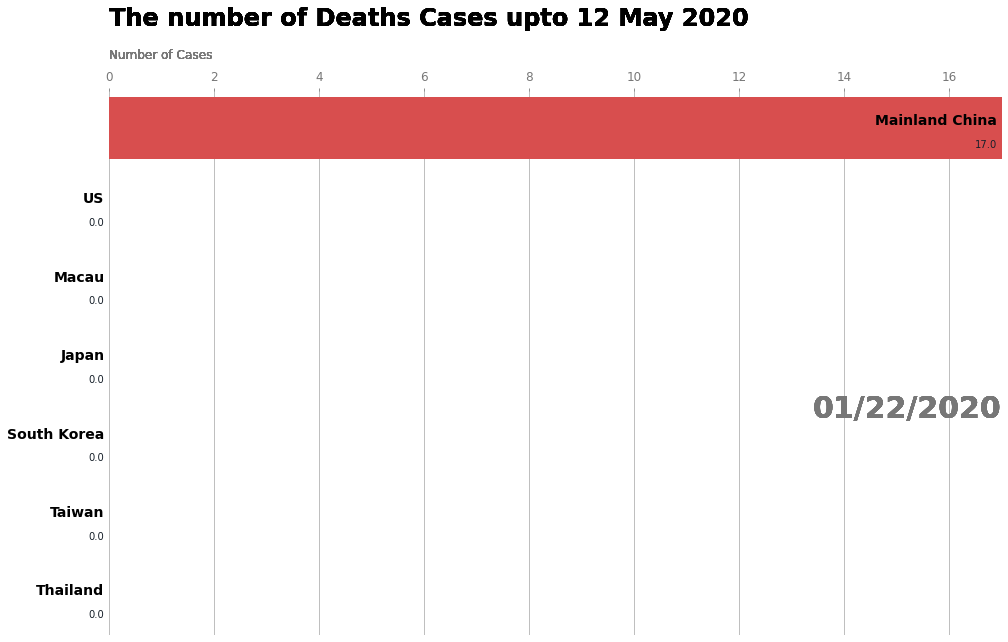

In [10]:
from matplotlib import animation as F
from IPython.display import HTML
fig,ax = plt.subplots(figsize=(16,10)) #Set figure for bar chart
animator = F.FuncAnimation(fig,draw_barchart,frames=covid.Date.unique(),interval=500) #Building animation
HTML(animator.to_jshtml())
#animator.save('animation.mp4') 